# Least squares Fit: the typical bias

The typical bias: fit skewed data (data with a tail) with a gaussian. An example using the general:
- scipy.stats.rv_continuous.fit


In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

## Generate the dataset on a lognorm
This dataset has a positive skewness (tail on the right)

In [2]:
# Generate the dataset on a lognorm
# positive skewness (tail on the right)
nevts=10000
a, b = 0.25, 0
data = lognorm.rvs(a, b, size=nevts) # see slides on continuous distributions
print ("data:", data)

data: [0.98012845 0.9417804  1.16029326 ... 1.16283386 1.01274264 0.95623936]


In [3]:
# histogram the data
xmin = 0.
xmax = 3.0
binsize = 0.1
hdata, bins = np.histogram(data, bins=np.arange(xmin, xmax+binsize, binsize))
print ("hdata:", hdata)
print ("bins:", bins)

# plot the histogram
# plt.hist(data,bins)# arguments are passed to np.histogram

hdata: [   0    0    0    0   17  195  577 1080 1503 1687 1508 1212  826  556
  350  212  123   66   42   19   13    4    4    3    2    0    1    0
    0    0]
bins: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]


In [4]:
# fit with a gaussian
mu, sigma = norm.fit(data)
print ("mu = {:1.4f} ; sigma = {:1.4f}".format(mu, sigma))

mu = 1.0267 ; sigma = 0.2583


In [5]:
# plot the gaussian with the best estimate of the parameters
# gaussian sampled at the centre of the bin
x = bins[:-1]+binsize/2.
print (x)
gauss = norm.pdf(x, mu, sigma)

# plot the normalized histogram and fit
# plt.hist(data, bins, density=True)# arguments are passed to np.histogram
# plt.plot(x, gauss)
# plt.show()

# plot the histogram and fit
# plt.hist(data, bins, density=False)# arguments are passed to np.histogram
# plt.plot(x, gauss*nevts*binsize)
# plt.show()

# plot the histogram and fit (increase number of points to draw the fit)
plt.hist(data, bins, density=False)# arguments are passed to np.histogram
finerbin = 0.01
gbins = np.arange(xmin, xmax+finerbin, finerbin) #take a large number of points to plot a smooth the gaussian
gauss = norm.pdf(gbins, mu, sigma)
plt.plot(gbins, gauss*nevts*binsize)
plt.show()

[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95]


Fit a subset of the data

events in the new range =  9161
mu = 0.9760 ; sigma = 0.1986


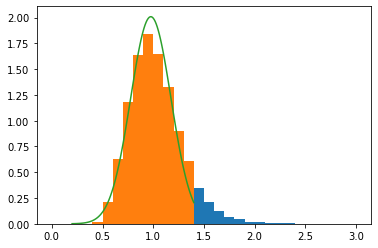

In [6]:
# original dataset
plt.hist(data, bins, density = True)

#fit range
minrange = 0.2
maxrange = 1.4

# select only the data in the range you want to fit
data_range = [ x for x in data if minrange <= x <= maxrange ]
nevtsrange = len(data_range)
print ("events in the new range = ", nevtsrange)

# fit with a gaussian
mu, sigma = norm.fit(data_range)
print ("mu = {:1.4f} ; sigma = {:1.4f}".format(mu, sigma))

# plot the normalized histogram and fit
x = bins[:-1]+binsize/2.
plt.hist(data_range, bins, density=True)# arguments are passed to np.histogram
# print(x)

# finer binning just to have a smooth curve
finerbin = 0.01
gbins = np.arange(minrange, maxrange+finerbin, finerbin)
gauss = norm.pdf(gbins, mu, sigma)
plt.plot(gbins, gauss)
plt.show()